In [1]:
import sunpy
import sunpy.map
import matplotlib.pyplot as plt
import astropy
from astropy.visualization import AsinhStretch, ImageNormalize
import astropy.constants as const
import astropy.units as u
import numpy as np

In [2]:
saffron_spice_NeVIII_map_all = sunpy.map.Map("../../src/SPICE/20221020/lvl3_saffron/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000_00770.42-ne_8_con-00_time-240307T174918.fits")

In [5]:
saffron_spice_NeVIII_int_map = saffron_spice_NeVIII_map_all[0].submap([0,120]*u.pix,top_right=[223,699]*u.pix)
saffron_spice_NeVIII_vel_map_data = saffron_spice_NeVIII_map_all[1].data
saffron_spice_NeVIII_vel_map_data = (saffron_spice_NeVIII_vel_map_data/np.nanmedian(saffron_spice_NeVIII_vel_map_data) - 1)*const.c.to_value(u.km/u.s)
saffron_spice_NeVIII_vel_map_data = saffron_spice_NeVIII_vel_map_data - np.nanmedian(saffron_spice_NeVIII_vel_map_data, axis=0)
saffron_spice_NeVIII_vel_map = sunpy.map.Map(saffron_spice_NeVIII_vel_map_data, saffron_spice_NeVIII_map_all[1].meta)
saffron_spice_NeVIII_vel_map = saffron_spice_NeVIII_vel_map.submap([0,120]*u.pix,top_right=[223,699]*u.pix)

In [6]:
saffron_spice_NeVIII_int_map.meta["rsun_ref"] = 696000000.0
saffron_spice_NeVIII_int_map.plot_settings['cmap'] = 'sohoeit171'
saffron_spice_NeVIII_int_map.plot_settings['norm'] = ImageNormalize(vmin=0,vmax=5,stretch=AsinhStretch(0.05))
saffron_spice_NeVIII_int_map.plot_settings['aspect'] = saffron_spice_NeVIII_int_map.scale.axis2/saffron_spice_NeVIII_int_map.scale.axis1
saffron_spice_NeVIII_vel_map.meta["rsun_ref"] = 696000000.0
saffron_spice_NeVIII_vel_map.plot_settings['cmap'] = 'coolwarm'
saffron_spice_NeVIII_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-40,vmax=40)
saffron_spice_NeVIII_vel_map.plot_settings['aspect'] = saffron_spice_NeVIII_vel_map.scale.axis2/saffron_spice_NeVIII_vel_map.scale.axis1


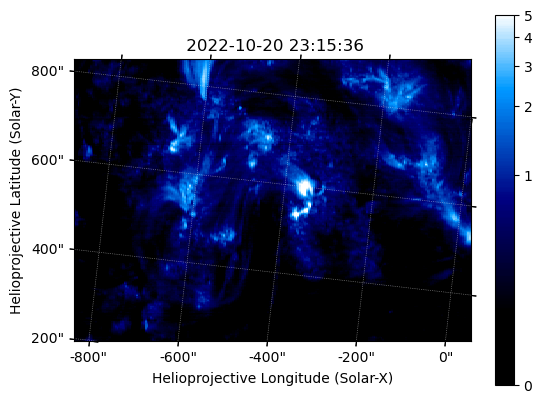

In [7]:
saffron_spice_NeVIII_int_map.plot()
plt.colorbar()

In [8]:
saffron_spice_NeVIII_int_map.meta

MetaDict([('simple': 'True')
('bitpix': '-64')
('naxis': '2')
('naxis1': '224')
('naxis2': '580')
('extend': 'True')
('wcsaxes': '3')
('crpix1': '112.5')
('crpix2': '296.5')
('crpix3': '1.0')
('pc1_1': '0.993437010613')
('pc1_2': '-0.0313974558467')
('pc2_1': '0.416686817186')
('pc2_2': '0.993437010613')
('pc3_1': '-60.25')
('cdelt1': '0.0011111111111111')
('cdelt2': '0.000305')
('cdelt3': '1.0')
('cunit1': 'deg')
('cunit2': 'deg')
('cunit3': 's')
('ctype1': 'HPLN-TAN')
('ctype2': 'HPLT-TAN')
('ctype3': 'UTC')
('crval1': '-0.11831583088917')
('crval2': '0.15810177170111')
('crval3': '6747.875')
('lonpole': '180.0')
('latpole': '0.15810177170111')
('cname1': 'Helioprojective longitude (Solar X), increases towards Solar West')
('cname2': 'Helioprojective latitude (Solar Y), increases towards Solar North')
('cname3': 'Time (Degenerate Dimension)')
('crder1': '0.368764064878')
('crder2': '0.335117413068')
('wcsname': 'Helioprojective-cartesian')
('timesys': 'UTC')
('dateref': '2022-10-20T2

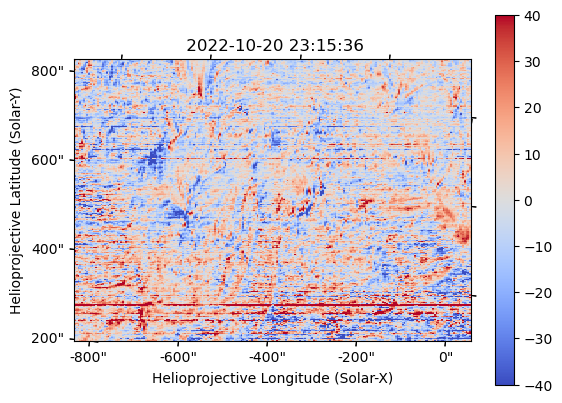

In [9]:
saffron_spice_NeVIII_vel_map.plot(interpolation="none")
plt.colorbar()

In [11]:
spice_NeVIII_int_map = sunpy.map.Map("../../src/SPICE/20221020/lvl3/NeVIII_int_deconv_plowman2023_1020_plowmanfit.fits")
spice_NeVIII_int_map.meta["rsun_ref"] = 696000000.0
spice_NeVIII_int_map.plot_settings['norm'] = ImageNormalize(stretch=AsinhStretch(0.05),vmin=0,vmax=20)
spice_NeVIII_int_map.plot_settings['cmap'] = "sohoeit171"
spice_NeVIII_int_map.plot_settings['aspect'] = spice_NeVIII_int_map.scale.axis2/spice_NeVIII_int_map.scale.axis1
if np.isclose(spice_NeVIII_int_map.center.Tx,-486.77676568*u.arcsec):
    spice_NeVIII_int_map = spice_NeVIII_int_map.shift_reference_coord(61.5933*u.arcsec,7.09162*u.arcsec)

spice_NeVIII_vel_map = sunpy.map.Map("../../src/SPICE/20221020/lvl3/NeVIII_vel_deconv_plowman2023_1020_plowmanfit.fits")
spice_NeVIII_vel_map = sunpy.map.Map(spice_NeVIII_vel_map.data - np.nanmedian(spice_NeVIII_vel_map.data, axis=0), 
                                     spice_NeVIII_vel_map.meta)
spice_NeVIII_vel_map.meta["rsun_ref"] = 696000000.0
spice_NeVIII_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-40,vmax=40)
spice_NeVIII_vel_map.plot_settings['cmap'] = "coolwarm"
spice_NeVIII_vel_map.plot_settings['aspect'] = spice_NeVIII_vel_map.scale.axis2/spice_NeVIII_vel_map.scale.axis1
if np.isclose(spice_NeVIII_vel_map.center.Tx,-486.77676568*u.arcsec):
    spice_NeVIII_vel_map = spice_NeVIII_vel_map.shift_reference_coord(61.5933*u.arcsec,7.09162*u.arcsec)

In [17]:
spice_NeVIII_vel_map.data.shape

(145, 224)

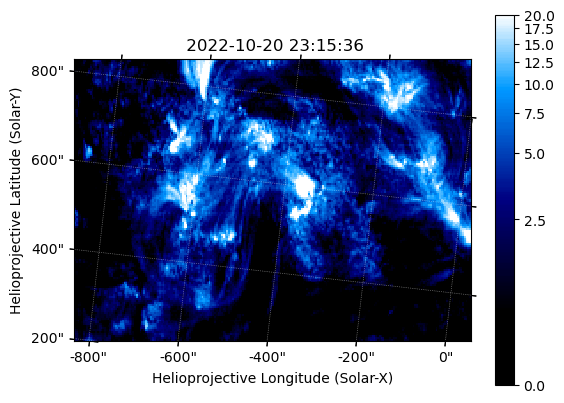

In [12]:
spice_NeVIII_int_map.plot()
plt.colorbar()

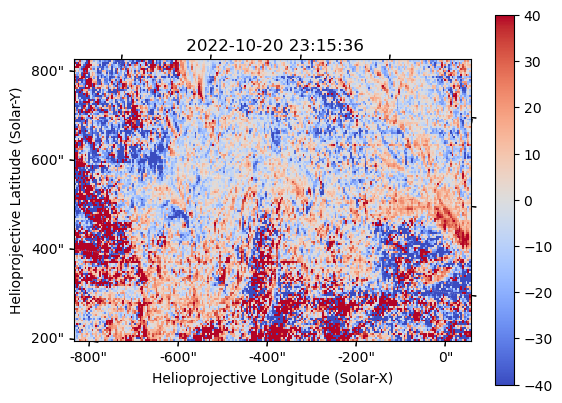

In [13]:
spice_NeVIII_vel_map.plot()
plt.colorbar()

In [14]:
saffron_spice_NeVIII_int_rebin = np.nanmean(saffron_spice_NeVIII_int_map.data.reshape(-1,4,224),axis=1)
saffron_spice_NeVIII_vel_rebin = np.nanmean(saffron_spice_NeVIII_vel_map.data.reshape(-1,4,224),axis=1)

In [15]:
saffron_plowman_int_diff = (spice_NeVIII_int_map.data - saffron_spice_NeVIII_int_rebin)
saffron_plowman_vel_diff = (spice_NeVIII_vel_map.data - saffron_spice_NeVIII_vel_rebin)

saffron_plowman_int_diff_map = sunpy.map.Map(saffron_plowman_int_diff, spice_NeVIII_int_map.meta)
saffron_plowman_int_diff_map.meta["rsun_ref"] = 696000000.0
saffron_plowman_vel_diff_map = sunpy.map.Map(saffron_plowman_vel_diff, spice_NeVIII_vel_map.meta)
saffron_plowman_vel_diff_map.meta["rsun_ref"] = 696000000.0

Text(0.5, 1.0, 'Plowman - Slimane Velocity Difference')

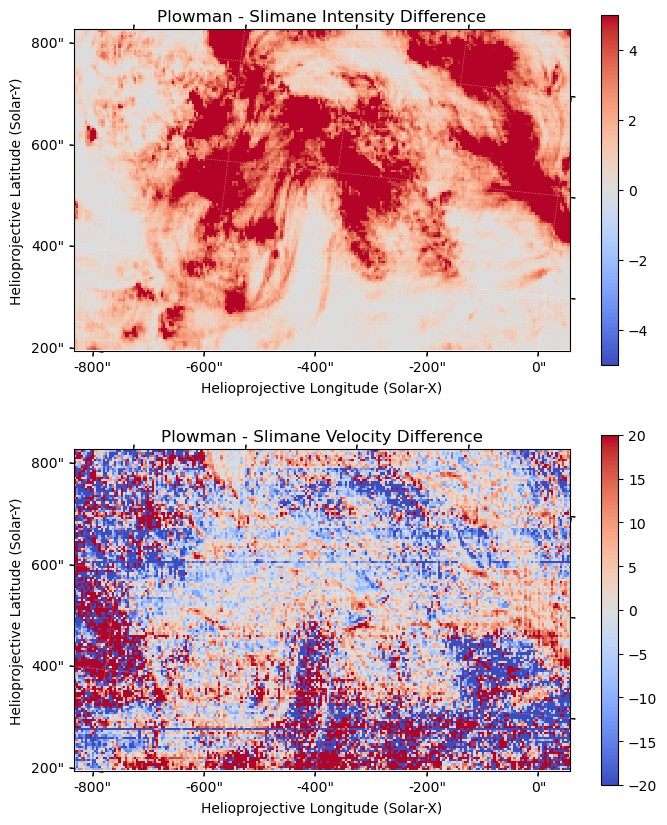

In [16]:
fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(211,projection=saffron_plowman_int_diff_map)
saffron_plowman_int_diff_map.plot(cmap="coolwarm",vmin=-5,vmax=5)
plt.colorbar()
ax1.set_title("Plowman - Slimane Intensity Difference")

ax2 = fig.add_subplot(212,projection=saffron_plowman_vel_diff_map)
saffron_plowman_vel_diff_map.plot(cmap="coolwarm",vmin=-20,vmax=20)
plt.colorbar()
ax2.set_title("Plowman - Slimane Velocity Difference")